In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Loading data:

In [2]:
glass_data=pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\KNN\\glass.csv")

In [3]:
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Checking for null values:

In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There are no null values:

### Checking for duplicate values:

In [5]:
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


### Removing duplicate values:

In [7]:
glass_data.drop_duplicates(inplace=True)

There are no null values:

### Seperating dependant and independent variables:

In [8]:
x=glass_data.iloc[:,:-1]
y=glass_data.iloc[:,-1]

### Using standard scaler to scale independent variables:

In [9]:
ss=StandardScaler()
x=ss.fit_transform(x)

### Box plot of the independant variables:

<AxesSubplot:>

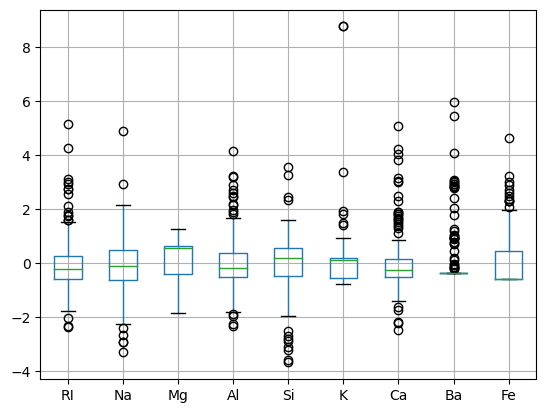

In [10]:
glass_x=glass_data.iloc[:,:-1]
s=0
for i in glass_x.columns:
    glass_x[i]=x[:,s]
    s=s+1
glass_x.boxplot()

### Distribution plots of independent variables:

In [11]:
sns.distplot(glass_data.iloc[:,0])

<AxesSubplot:xlabel='RI', ylabel='Density'>

In [12]:
sns.distplot(glass_data.iloc[:,1])

<AxesSubplot:xlabel='Na', ylabel='Density'>

In [13]:
sns.distplot(glass_data.iloc[:,2])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

In [14]:
sns.distplot(glass_data.iloc[:,3])

<AxesSubplot:xlabel='Al', ylabel='Density'>

In [15]:
sns.distplot(glass_data.iloc[:,4])

<AxesSubplot:xlabel='Si', ylabel='Density'>

In [16]:
sns.distplot(glass_data.iloc[:,5])

<AxesSubplot:xlabel='K', ylabel='Density'>

In [17]:
sns.distplot(glass_data.iloc[:,6])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

In [18]:
sns.distplot(glass_data.iloc[:,7])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

In [19]:
sns.distplot(glass_data.iloc[:,8])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

In [20]:
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

### BUilding a model and checking the cross validation score for a K value of 15:

In [22]:
loo=LeaveOneOut()
model=KNeighborsClassifier(n_neighbors=15)
results=cross_val_score(model, x,y,cv=loo)


In [23]:
results

array([1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
results.mean()

0.6291079812206573

### Doing a grid seach to find the optimum K value:

In [25]:
n_neighbors = np.array(range(1,51))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [26]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid ,cv=loo)
grid.fit(x,y)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [27]:
print(grid.best_params_,grid.best_score_)

{'n_neighbors': 3} 0.7183098591549296


The optimum value was found with K=3 with an accuracy of 71.83%:

### Plotting the accuracy values against K:

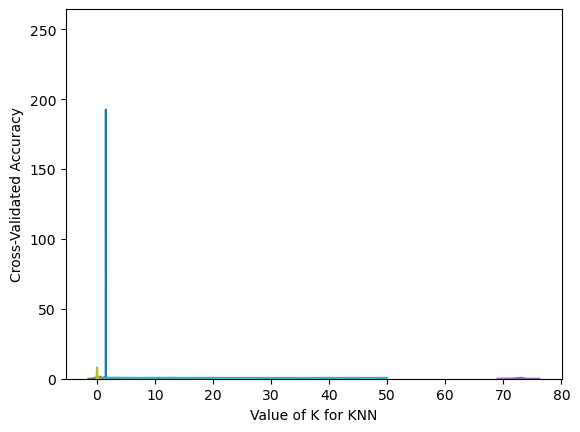

In [28]:
k_range=range(1,51)
k_scores=[]
loo=LeaveOneOut()
for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model, x,y,cv=loo)
    k_scores.append(results.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()